In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

#### Link to Dataset: https://www.kaggle.com/hugodarwood/epirecipes

In [253]:
df = pd.read_csv('Epicurious Recipe Dataset/epi_r.csv')

In [254]:
df['holidays'] = df['bastille day'] + df['christmas'] + df['christmas eve'] + df['cinco de mayo'] + df['diwali'] + df['easter'] + df["father's day"] + df['fourth of july'] + df['friendsgiving'] + df['halloween'] + df['hanukkah'] + df['kosher for passover'] + df['kwanzaa'] + df['labor day'] + df['lunar new year'] + df['mardi gras'] + df["mother's day"] + df["new year's day"] + df["new year's eve"] + df['passover'] + df['persian new year'] + df['purim'] + df['ramadan'] + df['rosh hashanah/yom kippur'] + df['shavuot'] + df["st. patrick's day"] + df['sukkot'] + df['thanksgiving'] + df["valentine's day"]

In [255]:
df['holidays'] = [1 if i > 0 else 0 for i in df['holidays']]

In [256]:
df = df[['title','rating','calories','protein','fat','sodium','appetizer','dessert','dinner','low carb','low sugar'
         ,'meat','vegan','vegetarian','snack','alcoholic','holidays']]

In [257]:
df = df[(df['calories']<1500) & (df['calories']>10)]

In [258]:
df = df[df['rating']>0]

In [259]:
df[['protein','fat']] = df[['protein','fat']].fillna(0)

In [260]:
df.head()

,title,rating,calories,protein,fat,sodium,appetizer,dessert,dinner,low carb,low sugar,meat,vegan,vegetarian,snack,alcoholic,holidays
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [261]:
df.describe()

,rating,calories,protein,fat,sodium,appetizer,dessert,dinner,low carb,low sugar,meat,vegan,vegetarian,snack,alcoholic,holidays
count,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000
mean,4.091230,417.639620,17.954032,23.248070,623.534530,0.069703,0.188590,0.117672,0.019088,0.000572,0.013726,0.091578,0.362739,0.000715,0.024164,0.211038
std,0.658391,295.871208,22.976825,21.313609,2685.062519,0.254654,0.391197,0.322231,0.136839,0.023909,0.116356,0.288440,0.480808,0.026729,0.153562,0.408060
min,1.250000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,204.000000,3.000000,8.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,335.000000,8.000000,18.000000,295.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,564.000000,25.000000,32.000000,680.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,1497.000000,203.000000,151.000000,132220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Count-Related Visualizations

### What is the general range of values for the binary features?

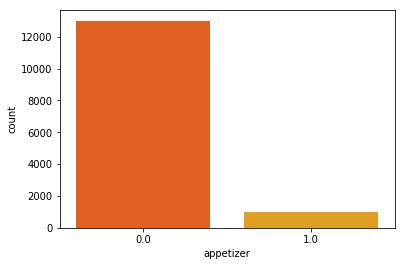

In [262]:
sns.countplot(x="appetizer",
 data=df,
 palette="autumn")

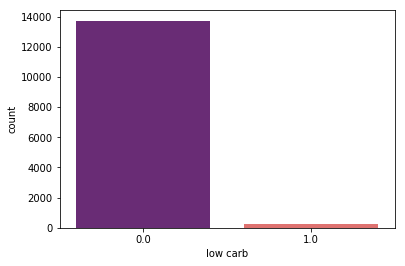

In [263]:
sns.countplot(x="low carb",
 data=df,
 palette="magma")

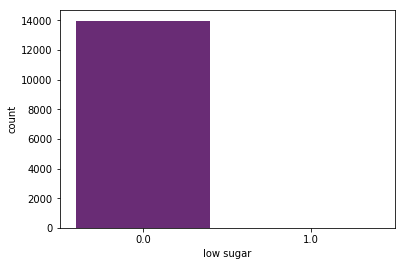

In [264]:
sns.countplot(x="low sugar",
 data=df,
 palette="magma")

In [265]:
df['low sugar'].value_counts()

0.0    13980
1.0        8
Name: low sugar, dtype: int64

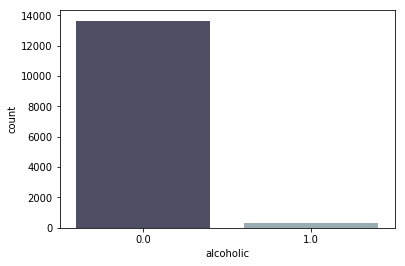

In [266]:
sns.countplot(x="alcoholic",
 data=df,
 palette="bone")

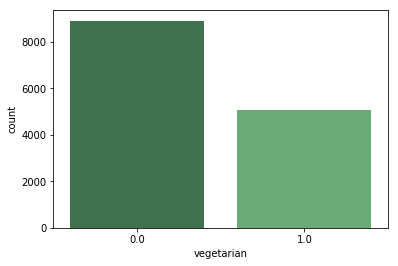

In [267]:
sns.countplot(x="vegetarian",
 data=df,
 palette="Greens_d")

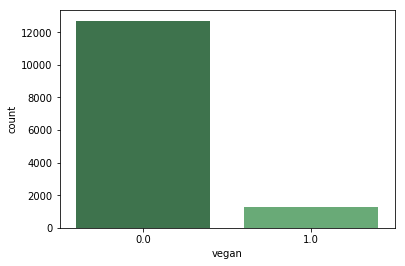

In [268]:
sns.countplot(x="vegan",
 data=df,
 palette="Greens_d")

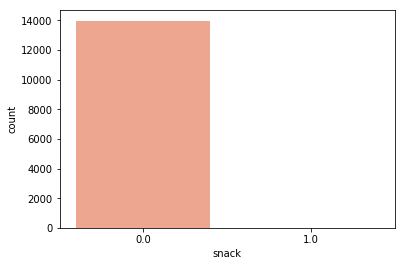

In [269]:
sns.countplot(x="snack",
 data=df,
 palette="Reds")

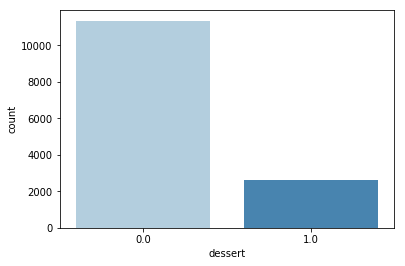

In [270]:
sns.countplot(x="dessert",
 data=df,
 palette="Blues")

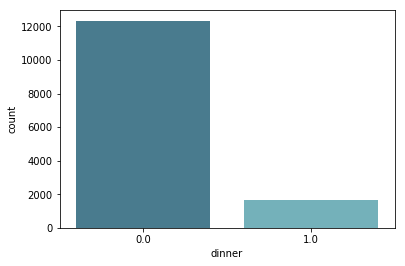

In [271]:
sns.countplot(x="dinner",
 data=df,
 palette="GnBu_d")

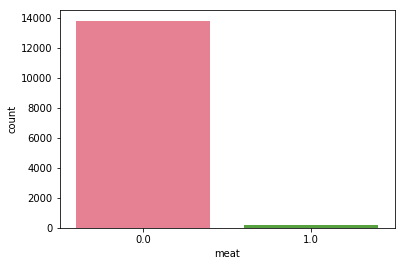

In [272]:
sns.countplot(x="meat",
 data=df)

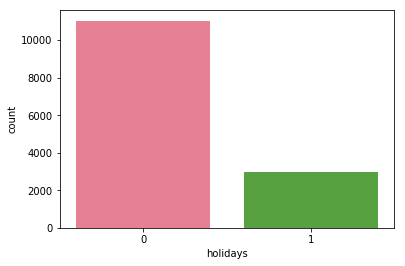

In [273]:
sns.countplot(x="holidays",
 data=df)

## Finding Trends

### What are the anomalies for the numerical data? Does the majority of the data fall in the interquartile range?

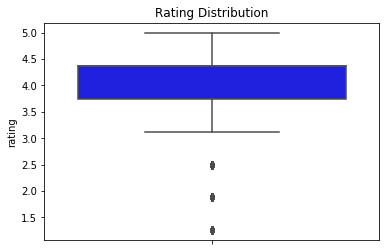

In [275]:
sns.boxplot(y=df["rating"], color='b')
plt.title('Rating Distribution')
plt.show()

#### The majority of recipie ratings are between 3.5 and 4.5.  The lower whisker stops a little over a 3.0 rating, with outliers extending into the lower scores.  These scores will be excluded

In [276]:
df = df[df['rating']>=3]

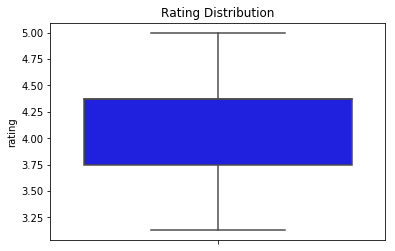

In [277]:
sns.boxplot(y=df["rating"], color='b')
plt.title('Rating Distribution')
plt.show()

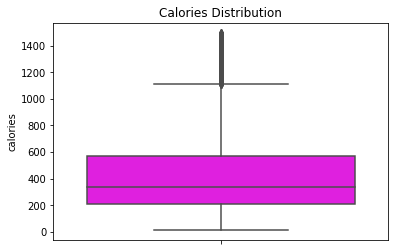

In [278]:
sns.boxplot(y=df["calories"], color='fuchsia') 
plt.title('Calories Distribution')
plt.show()

### The majority of the calories are between 200 and 600.  The higher whisker stops at an amount slightly under 1200, with many outliers above that threshold.  The recipes with these outlier calorie counts will be excluded

In [279]:
df['calories'].describe()

count    13386.000000
mean       420.827432
std        296.503013
min         11.000000
25%        206.000000
50%        338.000000
75%        569.000000
max       1497.000000
Name: calories, dtype: float64

In [280]:
df = df[df['calories']<=1050]

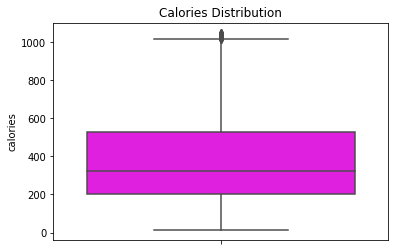

In [281]:
sns.boxplot(y=df["calories"], color='fuchsia') 
plt.title('Calories Distribution')
plt.show()

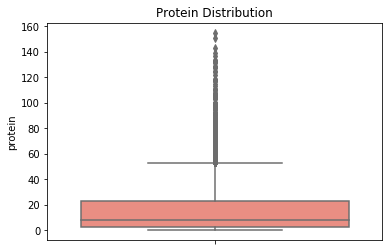

In [201]:
sns.boxplot(y=df["protein"], color='salmon') 
plt.title('Protein Distribution')
plt.show()

### Here the data is skewed, and there are many outliers.  The majority of the protein in the recipes are under 25, with the upper whiskery stopping at around 60 grams. The outliers beyond this threshold will be excluded

In [305]:
df = df[df['protein']<=50]

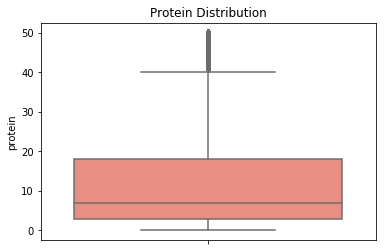

In [306]:
sns.boxplot(y=df["protein"], color='salmon') 
plt.title('Protein Distribution')
plt.show()

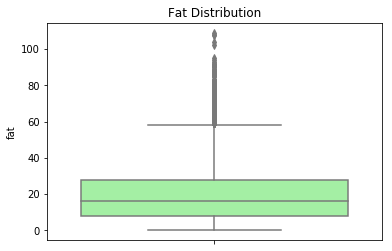

In [284]:
sns.boxplot(y=df["fat"], color='palegreen') 
plt.title('Fat Distribution')
plt.show()

In [286]:
df = df[df['fat']<=60]

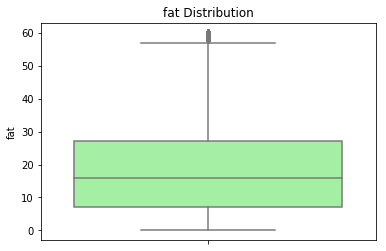

In [287]:
sns.boxplot(y=df["fat"], color='palegreen') 
plt.title('fat Distribution')
plt.show()

## Histograms and Scatterplots

Text(0,0.5,'Frequency')

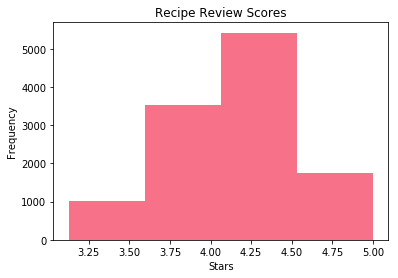

In [441]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['rating'], bins = 4)
# set title and labels
ax.set_title('Recipe Review Scores')
ax.set_xlabel('Stars')
ax.set_ylabel('Frequency')

### Calories

In [404]:
df.calories.describe()

count    11713.00000
mean       343.44139
std        205.89596
min         11.00000
25%        192.00000
50%        300.00000
75%        473.00000
max       1047.00000
Name: calories, dtype: float64

Text(0,0.5,'Frequency')

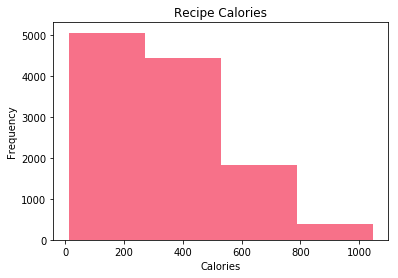

In [405]:
fig, ax = plt.subplots()
ax.hist(df['calories'], bins = 4)
ax.set_title('Recipe Calories')
ax.set_xlabel('Calories')
ax.set_ylabel('Frequency')

In [399]:
df1 = df.copy()

In [400]:
df1.describe()

,rating,calories,protein,fat,sodium,appetizer,dessert,dinner,low carb,low sugar,meat,vegan,vegetarian,snack,alcoholic,holidays,caloriesLog
count,11713.000000,11713.00000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000
mean,4.171007,343.44139,12.212243,18.097669,499.391104,0.075216,0.203876,0.098096,0.016648,0.000512,0.010928,0.099291,0.398702,0.000768,0.026381,0.212243,5.613645
std,0.519868,205.89596,12.678629,13.979213,2227.539673,0.263750,0.402895,0.297457,0.127955,0.022628,0.103969,0.299066,0.489652,0.027710,0.160272,0.408913,0.754895
min,3.125000,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.397895
25%,3.750000,192.00000,3.000000,7.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.257495
50%,4.375000,300.00000,7.000000,15.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.703782
75%,4.375000,473.00000,18.000000,26.000000,592.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.159095
max,5.000000,1047.00000,50.000000,60.000000,132025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.953684


In [401]:
df1 = df1[(df1.calories>192)&(df1.calories<500)]

In [408]:
df['SqrtCalories'] = np.sqrt(df.calories)

Text(0,0.5,'Frequency')

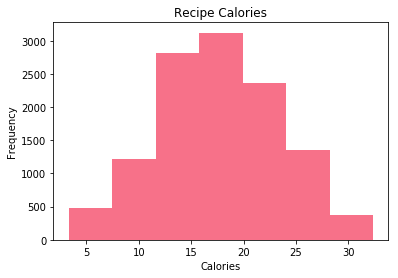

In [409]:
fig, ax = plt.subplots()
ax.hist(df.SqrtCalories, bins = 7)
ax.set_title('Recipe Calories')
ax.set_xlabel('Calories')
ax.set_ylabel('Frequency')

### Applying a square root transformation to the calories feature resulted in a Gaussian distribution.

### Protein

Text(0,0.5,'Frequency')

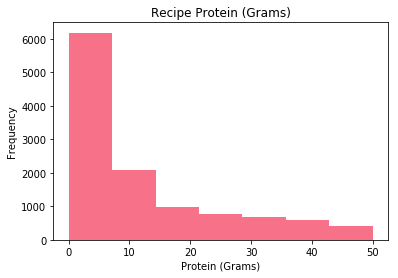

In [410]:
fig, ax = plt.subplots()
ax.hist(df['protein'], bins = 7)
ax.set_title('Recipe Protein (Grams)')
ax.set_xlabel('Protein (Grams)')
ax.set_ylabel('Frequency')

### The majority of the protein values are on the lower end of the value spectrum.

In [413]:
df['SqrtProtein'] = np.sqrt(df.protein)

Text(0,0.5,'Frequency')

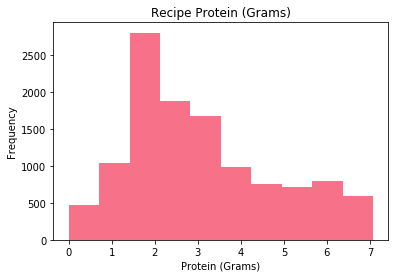

In [422]:
fig, ax = plt.subplots()
ax.hist(df['SqrtProtein'], bins = 10)
ax.set_title('Recipe Protein (Grams)')
ax.set_xlabel('Protein (Grams)')
ax.set_ylabel('Frequency')

In [418]:
df['LogProtein'] = np.log(df.protein+1)

Text(0,0.5,'Frequency')

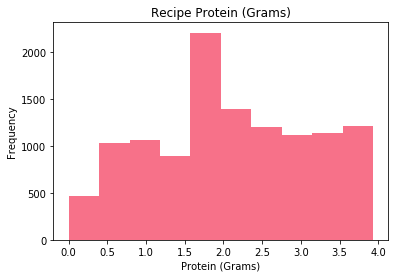

In [426]:
fig, ax = plt.subplots()
ax.hist(df['LogProtein'], bins = 10)
ax.set_title('Recipe Protein (Grams)')
ax.set_xlabel('Protein (Grams)')
ax.set_ylabel('Frequency')

### Performing the log(x+1) transformation on the protein feature in the filtered data has resulted in a Gaussian like distribution.

### Fat 

Text(0,0.5,'Frequency')

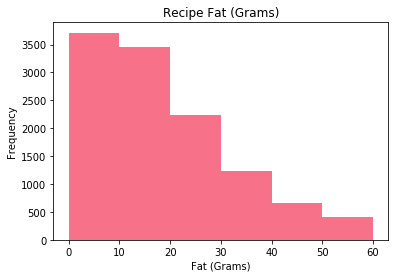

In [433]:
fig, ax = plt.subplots()
ax.hist(df['fat'], bins = 6)
ax.set_title('Recipe Fat (Grams)')
ax.set_xlabel('Fat (Grams)')
ax.set_ylabel('Frequency')

### Similarly to protein, the majority of the fat values are on the lower end of the value spectrum

In [434]:
df['LogFat'] = np.log(df.fat+1)

Text(0,0.5,'Frequency')

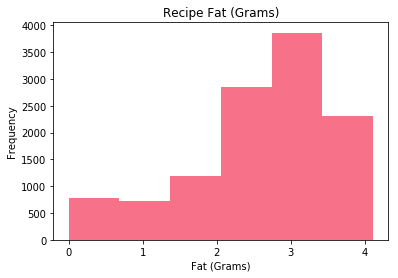

In [435]:
fig, ax = plt.subplots()
ax.hist(df['LogFat'], bins = 6)
ax.set_title('Recipe Fat (Grams)')
ax.set_xlabel('Fat (Grams)')
ax.set_ylabel('Frequency')

In [436]:
df['SqrtFat'] = np.sqrt(df.fat)

Text(0,0.5,'Frequency')

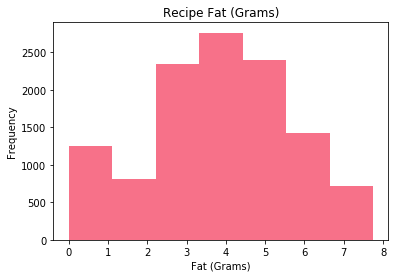

In [437]:
fig, ax = plt.subplots()
ax.hist(df['SqrtFat'], bins = 7)
ax.set_title('Recipe Fat (Grams)')
ax.set_xlabel('Fat (Grams)')
ax.set_ylabel('Frequency')

### Applying the square root transformation to the fat feature resulted in a more Gaussian distribution.

In [442]:
df.describe()

,rating,calories,protein,fat,sodium,appetizer,dessert,dinner,low carb,low sugar,...,snack,alcoholic,holidays,caloriesLog,SqrtCalories,LogProtein,SqrtProtein,RecipProtein,LogFat,SqrtFat
count,11713.000000,11713.00000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,...,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000
mean,4.171007,343.44139,12.212243,18.097669,499.391104,0.075216,0.203876,0.098096,0.016648,0.000512,...,0.000768,0.026381,0.212243,5.613645,17.629133,2.109930,3.023675,0.198135,2.562402,3.832111
std,0.519868,205.89596,12.678629,13.979213,2227.539673,0.263750,0.402895,0.297457,0.127955,0.022628,...,0.027710,0.160272,0.408913,0.754895,5.714705,1.012601,1.752111,0.213806,1.040016,1.847399
min,3.125000,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.397895,3.316625,0.000000,0.000000,0.019608,0.000000,0.000000
25%,3.750000,192.00000,3.000000,7.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.257495,13.856406,1.386294,1.732051,0.052632,2.079442,2.645751
50%,4.375000,300.00000,7.000000,15.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.703782,17.320508,2.079442,2.645751,0.125000,2.772589,3.872983
75%,4.375000,473.00000,18.000000,26.000000,592.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.159095,21.748563,2.944439,4.242641,0.250000,3.295837,5.099020
max,5.000000,1047.00000,50.000000,60.000000,132025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.953684,32.357379,3.931826,7.071068,1.000000,4.110874,7.745967


## Correlations

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

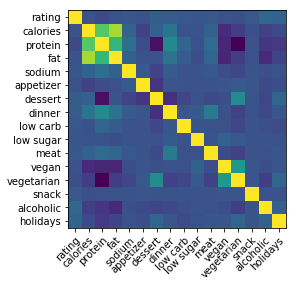

In [295]:
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

### The raw nutritional data histograms (prior to any data transformation) all had right skews, while the most frequent ratings were between around 4 and 4.5, indicating that recipes on the lower end of the spectrum lead to generally higher reviews on a scale of 1-5.

### The heatmap shows a correlation among protein, fat, and calories.  This is expected as the higher a calorie count of a recipe, the more likely it has a higher amount of protein or fat (or carbohydrates, not a feature currently).

In [469]:
### below scatterplots are a work in progress

In [458]:
y = df['rating']
x = df['calories']

Text(0,0.5,'Rating')

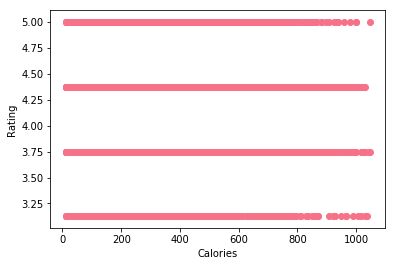

In [460]:
plt.scatter(x,y)
plt.xlabel('Calories')
plt.ylabel('Rating')

In [468]:
df[['rating']].head(10)

,rating
1,4.375
2,3.750
4,3.125
8,4.375
9,3.750
10,3.750
12,4.375
13,4.375
14,3.125
15,4.375


In [463]:
df['rating'].value_counts()

4.375    5419
3.750    3530
5.000    1745
3.125    1019
Name: rating, dtype: int64